[[-2.]
 [ 3.]] [[ 2.92307692]
 [10.38461538]]


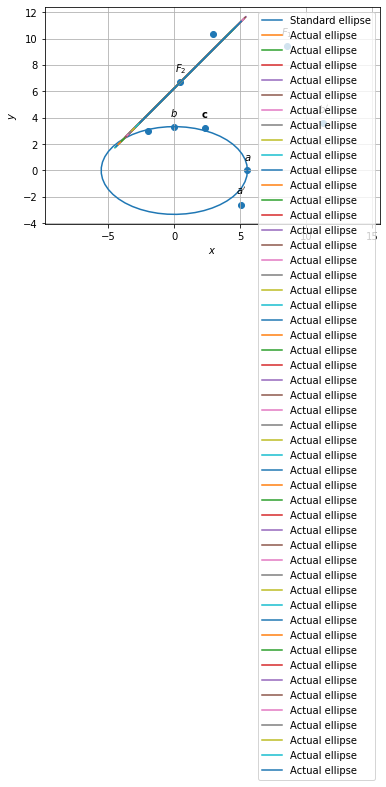

In [1]:
#Code by GVV Sharma
#July 25, 2021
#released under GNU GPL
#Drawing a triangle given 3 sides


import sys                                          #for path to external scripts
sys.path.insert(0, '/data/data/com.termux/files/home/storage/shared/github/training/math/codes/CoordGeo')        #path to my scripts

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
#import matplotlib

#local imports
from line.funcs import *
from triangle.funcs import *
from conics.funcs import ellipse_gen

#if using termux
import subprocess
import shlex
#end if

#Ellipse parameters
A = 261
B = -192
C = 181
d = 1044
E = -2334
f = 3969
F = np.array([-2,3]).reshape(2,1)
n = np.array([2,3]).reshape(2,1)
c = -4
e = 4/5

V = np.array(([A,B/2],[B/2,C]))
u = 1/2*np.array(([d,E])).reshape(2,1)

#Eigenvalues and eigenvectors
D_vec,P = LA.eig(V)
lam2 = D_vec[0]
lam1 = D_vec[1]
p1 = P[:,1].reshape(2,1)
p2 = P[:,0].reshape(2,1)
D = np.diag(D_vec)

#Output parameters
n = p1*np.sqrt(lam2) #Directrix normal vector
e = np.sqrt(1 - lam1/lam2)#Eccentricity
if(e == 1):
    c = (LA.norm(u)**2-lam2*f)/(2*e**2*u.T@n)
else:
    c1 = (e*(u.T@n)+np.sqrt(e**2*(u.T@n)**2+lam2*(1-e**2)*(LA.norm(u)**2-lam2*f)))/(lam2*e*(e**2-1))#Directrix constant1
    F1 = (c1*e**2*n-u)/lam2#Focus1
    c2 = (e*(u.T@n)-np.sqrt(e**2*(u.T@n)**2+lam2*(1-e**2)*(LA.norm(u)**2-lam2*f)))/(lam2*e*(e**2-1))#Directrix constant2
    F2 = (c2*e**2*n-u)/lam2#Focus2

#print(n,c1,c2,F1,F2)
a = np.sqrt((u.T@LA.inv(V)@u-f)/lam1).item()
b = np.sqrt((u.T@LA.inv(V)@u-f)/lam2).item()
cen = -LA.inv(V)@u
#print(a,b)

xStandardEllipse = ellipse_gen(a,b)

#Major and Minor Axes
MajorStandard = np.array(([a,0]))
MinorStandard = np.array(([0,b]))

#Affine transform 
xActualEllipse = P@xStandardEllipse+cen[:,np.newaxis]
MajorActual = P@MajorStandard+cen
MinorActual = P@MinorStandard+cen

# #

#Plotting the standard ellipse
plt.plot(xStandardEllipse[0,:],xStandardEllipse[1,:],label='Standard ellipse')

#Plotting the actual ellipse
plt.plot(xActualEllipse[0,:],xActualEllipse[1,:],label='Actual ellipse')

#print(MajorStandard,MinorStandard,MajorActual,MinorActual,cen.flatten())
print(F1,F2)

#Labeling the coordinates
tri_coords = np.vstack((MajorStandard,MinorStandard,MajorActual,MinorActual,cen.flatten(),F1.flatten(),F2.flatten())).T
plt.scatter(tri_coords[0,:], tri_coords[1,:])
vert_labels = ['$a$','$b$','$a^{\prime}$','$b^{\prime}$','$\mathbf{c}$','$F_1$','$F_2$']
for i, txt in enumerate(vert_labels):
    plt.annotate(txt, # this is the text
                 (tri_coords[0,i], tri_coords[1,i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid() # minor
plt.axis('equal')

plt.savefig('/data/data/com.termux/files/home/storage/shared/gitlab/res2021/july/conics/figs/ellipse.png')
plt.show()


